In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
data = pd.read_csv("Breast-Cancer.csv")

In [75]:
data.head()

,gender,hereditary_history,age,weight,thickness_tumor,marital_status,marital_length,pregnency_experience,giving_birth,abortion,blood,smoking,alcohol,breast_pain,Condition
0,0,1,29,77,90,1,0,1,1,1,0,0,0,1,0
1,0,0,37,96,50,0,0,0,0,0,4,0,1,1,0
2,0,1,33,89,90,0,0,0,0,0,2,0,0,0,0
3,0,1,63,88,40,1,1,1,5,1,0,1,0,1,0
4,0,0,25,76,50,1,0,1,3,0,0,1,1,1,0


In [76]:
data.shape

(1050, 15)

In [77]:
data.columns

Index(['gender', 'hereditary_history', 'age', 'weight', 'thickness_tumor',
       'marital_status', 'marital_length', 'pregnency_experience',
       'giving_birth', 'abortion', 'blood', 'smoking', 'alcohol',
       'breast_pain', 'Condition'],
      dtype='object')

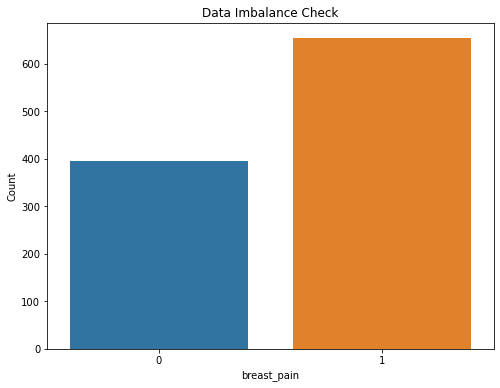

In [78]:
import matplotlib.pyplot as plt

# Create a count plot using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='breast_pain')
plt.xlabel('breast_pain')
plt.ylabel('Count')
plt.title('Data Imbalance Check')
plt.show()

In [79]:
print(data.isnull().sum())

gender                  0
hereditary_history      0
age                     0
weight                  0
thickness_tumor         0
marital_status          0
marital_length          0
pregnency_experience    0
giving_birth            0
abortion                0
blood                   0
smoking                 0
alcohol                 0
breast_pain             0
Condition               0
dtype: int64


In [80]:
#printing out the all the unique featuers in the data set
for column in data:
    unique_vals = np.unique(data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.
              format(column, 
        nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.
              format(column, nr_values))

The number of values for feature gender :2 -- [0 1]
The number of values for feature hereditary_history :2 -- [0 1]
The number of values for feature age :76
The number of values for feature weight :49
The number of values for feature thickness_tumor :18
The number of values for feature marital_status :2 -- [0 1]
The number of values for feature marital_length :2 -- [0 1]
The number of values for feature pregnency_experience :2 -- [0 1]
The number of values for feature giving_birth :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature abortion :2 -- [0 1]
The number of values for feature blood :8 -- [0 1 2 3 4 5 6 7]
The number of values for feature smoking :2 -- [0 1]
The number of values for feature alcohol :2 -- [0 1]
The number of values for feature breast_pain :2 -- [0 1]
The number of values for feature Condition :3 -- [0 1 2]


In [81]:
# Create two empty lists to store the integer and categorical column names
numerical_columns = []
categorical_columns = []

# Iterate over the columns in the raw data and add them to the appropriate list
for column in data.columns:
    if data[column].dtype == 'object' or len(data[column].unique()) < 5:
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
        
# Create two DataFrames to store the integer and categorical column names
integer_df = pd.DataFrame({'numerical_columns': numerical_columns})
categorical_df = pd.DataFrame({'categorical_columns': categorical_columns})

# Combine the two DataFrames into a single table
table = pd.concat([integer_df, categorical_df], axis=1)

# Display the table
print(table.to_string())

  numerical_columns   categorical_columns
0               age                gender
1            weight    hereditary_history
2   thickness_tumor        marital_status
3      giving_birth        marital_length
4             blood  pregnency_experience
5               NaN              abortion
6               NaN               smoking
7               NaN               alcohol
8               NaN           breast_pain
9               NaN             Condition


In [82]:
numerical_columns

['age', 'weight', 'thickness_tumor', 'giving_birth', 'blood']

import pandas as pd

numerical_columns = ['age', 'weight', 'thickness_tumor', 'giving_birth']

#### Define a function to remove outliers for a single column
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

#### Loop through each numerical column and remove outliers
for column in data.select_dtypes(include=['number']).columns:
    data = remove_outliers(data, column)

data.shape
after removing outliers it present a 60% loss in data , therefore i had here igonred the outlier removing process through IQR method.

In [83]:
import pandas as pd

#assign dummies for categorical data
data_new = pd.get_dummies(data,columns = ['gender',
                                         'hereditary_history',
                                         'marital_status',
                                         'marital_length',
                                         'pregnency_experience',
                                         'abortion',
                                         'smoking',
                                         'alcohol',
                                         'Condition',
                                         'blood'])
data_new

,age,weight,thickness_tumor,giving_birth,breast_pain,gender_0,gender_1,hereditary_history_0,hereditary_history_1,marital_status_0,...,Condition_1,Condition_2,blood_0,blood_1,blood_2,blood_3,blood_4,blood_5,blood_6,blood_7
0,29,77,90,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,37,96,50,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,33,89,90,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,63,88,40,5,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,25,76,50,3,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,33,71,50,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1046,33,65,70,0,1,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1047,32,96,30,0,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,0
1048,31,65,10,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [84]:
data_new.columns

Index(['age', 'weight', 'thickness_tumor', 'giving_birth', 'breast_pain',
       'gender_0', 'gender_1', 'hereditary_history_0', 'hereditary_history_1',
       'marital_status_0', 'marital_status_1', 'marital_length_0',
       'marital_length_1', 'pregnency_experience_0', 'pregnency_experience_1',
       'abortion_0', 'abortion_1', 'smoking_0', 'smoking_1', 'alcohol_0',
       'alcohol_1', 'Condition_0', 'Condition_1', 'Condition_2', 'blood_0',
       'blood_1', 'blood_2', 'blood_3', 'blood_4', 'blood_5', 'blood_6',
       'blood_7'],
      dtype='object')

In [85]:
data_new.head(10)

,age,weight,thickness_tumor,giving_birth,breast_pain,gender_0,gender_1,hereditary_history_0,hereditary_history_1,marital_status_0,...,Condition_1,Condition_2,blood_0,blood_1,blood_2,blood_3,blood_4,blood_5,blood_6,blood_7
0,29,77,90,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,37,96,50,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,33,89,90,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,63,88,40,5,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,25,76,50,3,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5,41,83,90,3,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,36,89,90,0,0,1,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
7,59,78,80,2,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,30,69,60,0,1,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
9,39,71,50,0,1,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


In [86]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and the target variable (y)
X = data_new.drop('breast_pain',axis = 1).values
y = data[['breast_pain']]

from sklearn.tree import DecisionTreeClassifier

# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

# Running Feature Importance

for i, column in enumerate(data_new.drop('breast_pain', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for age is: 0.211
The feature importance for weight is: 0.188
The feature importance for thickness_tumor is: 0.151
The feature importance for giving_birth is: 0.040
The feature importance for gender_0 is: 0.006
The feature importance for gender_1 is: 0.000
The feature importance for hereditary_history_0 is: 0.006
The feature importance for hereditary_history_1 is: 0.006
The feature importance for marital_status_0 is: 0.013
The feature importance for marital_status_1 is: 0.000
The feature importance for marital_length_0 is: 0.005
The feature importance for marital_length_1 is: 0.011
The feature importance for pregnency_experience_0 is: 0.004
The feature importance for pregnency_experience_1 is: 0.006
The feature importance for abortion_0 is: 0.012
The feature importance for abortion_1 is: 0.024
The feature importance for smoking_0 is: 0.000
The feature importance for smoking_1 is: 0.009
The feature importance for alcohol_0 is: 0.011
The feature importance for alco

In [87]:
data_new.columns

Index(['age', 'weight', 'thickness_tumor', 'giving_birth', 'breast_pain',
       'gender_0', 'gender_1', 'hereditary_history_0', 'hereditary_history_1',
       'marital_status_0', 'marital_status_1', 'marital_length_0',
       'marital_length_1', 'pregnency_experience_0', 'pregnency_experience_1',
       'abortion_0', 'abortion_1', 'smoking_0', 'smoking_1', 'alcohol_0',
       'alcohol_1', 'Condition_0', 'Condition_1', 'Condition_2', 'blood_0',
       'blood_1', 'blood_2', 'blood_3', 'blood_4', 'blood_5', 'blood_6',
       'blood_7'],
      dtype='object')

In [88]:
#Based upon DecisiontreeClasification feature selection 
selected_data = ['age', 'weight', 'thickness_tumor', 'giving_birth','marital_status_0',
                         'marital_length_1','abortion_0','abortion_1','alcohol_0','Condition_0',
                         'Condition_1', 'Condition_2','blood_0','blood_2', 'blood_3','blood_5', 'blood_6']

In [89]:
# Split the dataset into features (X) and the target variable (y)
X = data_new[selected_data].values
y = data_new[['breast_pain']].values

In [90]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.20,random_state=40)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(840, 17)
(210, 17)
(840, 1)
(210, 1)


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

# Decision Trees
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Support Vector Machines (SVM)
svm = SVC(kernel='linear', C=1)  # Use a linear kernel for simplicity
svm.fit(X_train, y_train)

C:\Users\Bim\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bim\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

SVC(C=1, kernel='linear')

In [92]:
from sklearn.metrics import classification_report,confusion_matrix

# Evaluate the model
conf_matrix = confusion_matrix(y_test, logistic_reg.predict(X_test))
classification_rep = classification_report(y_test, logistic_reg.predict(X_test))

# The confusion matrix and classification report

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 23  62]
 [ 13 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.27      0.38        85
           1       0.64      0.90      0.75       125

    accuracy                           0.64       210
   macro avg       0.64      0.58      0.56       210
weighted avg       0.64      0.64      0.60       210



In [93]:
from sklearn.metrics import classification_report,confusion_matrix

# Evaluate the model
conf_matrix = confusion_matrix(y_test, decision_tree.predict(X_test))
classification_rep = classification_report(y_test, decision_tree.predict(X_test))

# The confusion matrix and classification report

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[40 45]
 [40 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48        85
           1       0.65      0.68      0.67       125

    accuracy                           0.60       210
   macro avg       0.58      0.58      0.58       210
weighted avg       0.59      0.60      0.59       210



In [94]:
from sklearn.metrics import classification_report,confusion_matrix

# Evaluate the model
conf_matrix = confusion_matrix(y_test, random_forest.predict(X_test))
classification_rep = classification_report(y_test, random_forest.predict(X_test))

# The confusion matrix and classification report

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 30  55]
 [ 20 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.35      0.44        85
           1       0.66      0.84      0.74       125

    accuracy                           0.64       210
   macro avg       0.63      0.60      0.59       210
weighted avg       0.63      0.64      0.62       210



In [95]:
from sklearn.metrics import classification_report,confusion_matrix

# Evaluate the model
conf_matrix = confusion_matrix(y_test, svm.predict(X_test))
classification_rep = classification_report(y_test, svm.predict(X_test))

# The confusion matrix and classification report

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 24  61]
 [ 13 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.28      0.39        85
           1       0.65      0.90      0.75       125

    accuracy                           0.65       210
   macro avg       0.65      0.59      0.57       210
weighted avg       0.65      0.65      0.61       210



C:\Users\Bim\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Bim\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bim\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

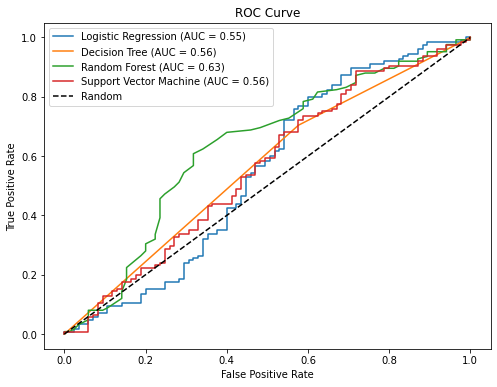

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.svm import SVC  # Import the SVM classifier

# Create multiple classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Ensure probability estimates are available
}

# Plot ROC curves for each classifier
plt.figure(figsize=(8, 6))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(X_test)[:, 1]
    else:
        # For SVM, you can use decision function and then convert to probabilities
        y_score = clf.decision_function(X_test)
        y_score = 1 / (1 + np.exp(-y_score))
    
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('sample_plot.png')
plt.show()

The Random Forest algorithm is the best-fitting algorithm that is for predicting breast cancer patients' recognition based on the above ROC curves. It has the highest Area Under the Curve (AUC) of 0.62, which means that it is the best at distinguishing between the two different classes of prediction accordingly.

Considering the other three algorithms, Logistic Regression, Decision Tree, and support vector machine have lower AUCs of 0.55, 0.55, and 0.56, respectively. This means that they are comparably lower in classifications and recognize the positive and negative classes as the Random Forest algorithm.

In conclusion, the Random Forest algorithm is the best-fitting algorithm for predictions based on the reflection of its AUC and the flow of the ROC curve. It has the highest AUC, which means that it is the best at distinguishing between the positive and negative classes and can be applicable to real-world scenarios for AI models and ML models.
